In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 432x288 with 0 Axes>

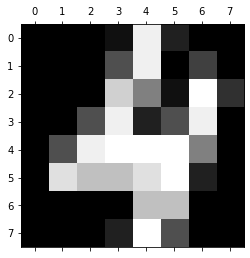

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

# KNN

In [6]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [7]:
vectors = np.array(vectors)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [9]:
X_train.shape

(4800, 784)

In [10]:
X_test.shape

(1200, 784)

In [11]:
def predict(test_point, X_train, y_train, k):
    distances = ((X_train - test_point) ** 2).sum(axis=1)
    indices = distances.argsort()[:k]
    classes = y_train[indices[0]]
    unique, counts = np.unique(classes, return_counts=True)
    closest_class = unique[np.argmax(counts)]
    return closest_class



In [12]:
def test():
    success = 0
    examples = X_test
    for e in range(len(examples)):
        z = predict(examples[e])
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

In [13]:
test_point = np.random.randint(255, size=(4800, 784))
predict(test_point,X_train,y_train,3)

'3'

# Perceptron

In [16]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [17]:
def train(target_char, opposite_char, steps, eta=0.1):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(train_data[0]['vector'].shape)
    weights = w
    for _ in range(steps):
        for e in train_data:
            x = e['vector']
            y = e['char']
            z = np.dot(x, w)
            if z >= 0 and y == opposite_char:
                w = w - eta * x
            elif z < 0 and y == target_char:
                w = w + eta * x
    return w


def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

In [18]:
weights = train('1','2',100)

In [19]:
test('1','2',weights)

0.9800995024875622

# Prostate

In [28]:
prostate_data = pd.read_csv('prostate.csv')
prostate_data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [21]:
prostate_data['lpsa'] = pd.cut(prostate_data['lpsa'], bins=3, labels=False)# hay que dividir en 10 las categorias

print(prostate_data['lpsa'].value_counts())

1    65
0    19
2    13
Name: lpsa, dtype: int64


Convierte los datos a matrices

In [22]:

X = prostate_data.values[:, 0:8]
print(X.shape)
y = prostate_data.values[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape

(97, 8)


(67, 8)

In [34]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, X_train, y_train, cv=5)

best_k = np.argmax(scores) + 1
print(best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, y_train)

# Testing 
y_pred = knn.predict(X_test)

4


In [33]:


# Predice las etiquetas de los datos de entrenamiento y de prueba
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy training", round(train_accuracy,4))
print("Accuracy testing", round(test_accuracy,4))

Accuracy training 0.7164
Accuracy testing 0.6333
